# Text Vectorization.

A. Only for the supervised task (data_supervised.csv): Group and join all comments of the
same author, creating a “new” dataset to be used for the supervised task (Section 2).

B: As ML algorithms struggle to handle directly the raw textual data. You are required to
convert the text into numerical representations (vectors) through Bag of Words (BoW).

C: Another way to assign a vector representation to a word is to associate the TF-IDF
representation (Term Frequency-Inverse Document Frequency) to each user/comment.
Can you observe and explain the differences between the numerical representations
generated by BoW and TF-IDF?


A Wrap up section at the bottom describing which files are created and where by this notebook is at the very end of the notebook. To change the input file instead view the very first cell of the notebook. Originally meant for only the supervised dataset as described by the requirements.

For problems contact Matteo Sottocornola on Telegram.

## Part 1

Only for the supervised task (data_supervised.csv): Group and join all comments of the
same author, creating a “new” dataset to be used for the supervised task (Section 2).

In [1]:
#Found stop words library for part 2
# Download stopwords and tokenizer if you haven't already
#nltk.download("punkt")
#nltk.download("stopwords")
#Basically contains how to do 1.2
#https://www.datacamp.com/tutorial/python-bag-of-words-model?dc_referrer=https%3A%2F%2Fwww.google.com%2F

#There's a bunch of numbers being tokenized, not sure how important they are to classifying. 
#Do they get eliminated in previous steps?

In [2]:
# TODO - CHECK WHAT to do with other attributes in part 1

In [3]:
# import as panda dataframe.
import pandas as pd
df = pd.read_csv("../data/data_supervised.csv")
print(df.shape)

(296042, 4)


In [4]:
temp = df.groupby("author").count()
print("number of unique users: ", temp.shape[0])

print("can see how many comments each user posted in body count: \n", temp)

number of unique users:  5000
can see how many comments each user posted in body count: 
                 subreddit  created_utc  body
author                                      
-Jared                  6            6     6
-Peeter                 1            1     1
-evasian               10           10    10
-rubiks                 9            9     9
-true_neutral-          2            2     2
...                   ...          ...   ...
zot13                   1            1     1
zottz                  38           38    38
zukinzo                 4            4     4
zzrr                    4            4     4
zzuil93                 2            2     2

[5000 rows x 3 columns]


In [5]:
#Actually doing part 1, merging the body for the same users.
df_text_only = df.drop(columns=['created_utc','subreddit'])
df_grouped = df_text_only.groupby('author')['body'].apply(" ".join).reset_index()
print(df_grouped)

              author                                               body
0             -Jared  Neil Diamond - Sweet Caroline +1 on the chirop...
1            -Peeter                         Just read the FAQ, really.
2           -evasian  I just received my Deathadder Black Edition ye...
3            -rubiks  AlunaGeorge - Best Be Believing\nArctic Monkey...
4     -true_neutral-  &gt; Urban Ears Metis\n\nYMMV. I have had thre...
...              ...                                                ...
4995           zot13  Hey! I think that is exactly what happened to ...
4996           zottz  I once got stuck in traffic at the top of the ...
4997         zukinzo  I'm afraid the only good thing that will do is...
4998            zzrr  I heard there's a bakery going in there ah yea...
4999         zzuil93  Love is like a meteorite. It goes as quick as ...

[5000 rows x 2 columns]


In [6]:
#Quick sanity check.
i=0 #select an index, and as such a user.
user = df.iloc[i,0]
print("user: ", user," posted this: ", df.iloc[i, 3])

print(df.groupby("author").size().loc[user] )
#df.groupby("author").count()['author'=df.iloc[0, 0]]

row = df_grouped[df_grouped["author"] == user] #user
print(row.iloc[0,1])

user:  Shamus_Aran  posted this:  I don't think we'd get nearly as much fanfiction and pictures shipping Ban-Ban and Lyro. Just saying.
20
I don't think we'd get nearly as much fanfiction and pictures shipping Ban-Ban and Lyro. Just saying. So, we meet again. She spoke as if she were playing an instrument -- no, as if she *was* an instrument, and one made of glass at that. She all but sang "good morning!" as she walked down the stairs, and yet I had to watch her come down, on the off-chance she'd slip and shatter into a million pieces. &gt;how about I about I unload a whole goddamn mag into your head so no one else has to deal with your shit

&gt;I'm going to cave your fucking skull in

...the white man typed, sitting in the air-conditioned comfort of his own room, far from the pressures of everyday life. I really hope that's a girl in there. It costs a charge to cast and gets one charge every time it's leveled up. "I want a set of armor that says 'I get up every morning at 7:00 and wa

## Part 2
B: As ML algorithms struggle to handle directly the raw textual data. You are required to
convert the text into numerical representations (vectors) through Bag of Words (BoW).

Bag of Words (BoW) is a technique widely used to transform textual data into machine-readable format, specifically numerical values, without considering grammar and word order.

We will be counting the occurence of every word in the vocabulary we use. Where the word was and it's actual structure is lost. Basically you are adding a new column for each word that is in our dataset and adding the number of times it was used for each row.

Note that executing 1.2 to remove stop words first is heavily recomended to reduce the number of words and hence attributes we get with BoW.

In [7]:
#useful example of BoW
#https://www.datacamp.com/tutorial/python-bag-of-words-model?dc_referrer=https%3A%2F%2Fwww.google.com%2F

from collections import defaultdict
import string

df_grouped = df_grouped[:50] #remove after 1.2 available, done to reduce complexity for now.

# Function to preprocess and tokenize
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize: split the text into words
    tokens = text.split()
    return tokens

# Apply preprocessing to each text individually first.
processed_corpus = []
for sentence in df_grouped.iloc[:, 1]:
    processed_corpus.append(preprocess(sentence))

print(processed_corpus)

[['neil', 'diamond', 'sweet', 'caroline', '1', 'on', 'the', 'chiropractor', 'i', 'went', 'religiously', 'from', 'ages', '14', '19', 'due', 'to', 'extreme', 'lower', 'back', 'pain', 'from', 'running', 'track', 'cross', 'country', 'its', 'important', 'to', 'remember', 'its', 'a', 'somewhat', 'slow', 'process', 'but', 'worth', 'the', 'results', 'oh', 'and', 'dont', 'worry', 'they', 'arent', 'cracking', 'your', 'back', 'its', 'just', 'an', 'adjustment', 'looks', 'like', 'the', 'pattern', 'on', 'the', 'envelope', 'that', 'middle', 'school', 'photos', 'came', 'in', 'if', 'you', 'had', 'a', 'bad', 'motivator', 'would', 'you', 'want', 'to', 'spell', 'that', 'out', 'every', 'time', 'and', 'nothing', 'beats', 'a', 'hangover', 'quite', 'like', 'bacon', 'or', 'better', 'yet', 'taylor', 'ham', 'eggs', 'over', 'easy', 'toast', 'and', 'hash', 'browns', 'no', 'i', 'think', 'you', 'mean', 'taylor', 'ham', 'really', 'whatever', 'you', 'call', 'it', 'doesnt', 'matter', 'its', 'damn', 'delicious'], ['just

In [8]:
#Take the individual tokenized texts and create a single vocabulary.

vocabulary = set()

# Build the vocabulary
for sentence in processed_corpus:
    vocabulary.update(sentence)

# Convert to a sorted list
vocabulary = sorted(list(vocabulary))
print("Vocabulary:", vocabulary)
#If it doesn't look correct it's cause it tokenizes numbers too and resorts them in it's own logic
#scroll enough and you find the words like you should.

Vocabulary: ['0', '00', '0000', '0001', '00s', '01', '019', '028', '045', '048052', '06', '07', '0914', '1', '10', '100', '1000', '100200', '100httpwwwyoutubecomwatchvufsej7aogi', '100km', '100something', '101', '1010', '1011', '1015', '102', '1020', '1023', '1043', '105', '1080', '10am', '10c', '10k', '10mph', '10th', '11', '110', '112', '1174', '11th', '12', '120', '1200', '12001400', '1207', '120wpm', '121', '1216', '12312008', '12500', '127', '128', '12mb', '12pm', '12year', '13', '130', '1300', '130lbs', '1314', '13541496', '138', '13m', '13yearold', '14', '140150', '140160', '1418', '1424', '144', '15', '150000', '15020', '154', '155', '15m18m', '16', '160', '16000', '1618', '162', '16s', '16x', '16x16', '170', '1700', '170lbs', '175', '176', '176625', '1779', '17ish', '18', '180', '18000', '180lbs', '182205858672', '1880', '18kgs', '19', '1900', '1910', '1910s', '1917', '1920s', '1926', '1927', '1928110142', '1930', '1932', '1933', '1947', '1950s”', '1960s', '1960sto', '1966', '

In [9]:
def create_bow_vector(sentence, vocab):
    vector = [0] * len(vocab)  # Initialize a vector of zeros
    for word in sentence:
        if word in vocab:
            idx = vocab.index(word)  # Find the index of the word in the vocabulary
            vector[idx] += 1  # Increment the count at that index
    return vector


In [10]:
print( len(vocabulary) ) #How many unique words and as such how many features we end up adding.
#19186 first time with only first 100, too much. Need the preprocessing of 1.1 and 1.2 to reduce.
#I'd also consider removing numbers which are being classed as words.
#Could also pre process by rounding numbers to nearest multiple of ten to reduce the unique values.

13063


In [11]:
# Create BoW vector for each sentence in the processed corpus
bow_vectors = [create_bow_vector(sentence, vocabulary) for sentence in processed_corpus]
print("Bag of Words Vectors:")
for vector in bow_vectors:
    print(vector)



Bag of Words Vectors:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
#Note that the order of the bow_vectors is the same as the order in df_grouped 
# so we can reassociate with the username.
print(type(bow_vectors))

<class 'list'>


In [13]:
#DEBUG
#Double check if plausible used a certain number of times the same word.
row = df_grouped[df_grouped["author"] == df_grouped.iloc[17,0]]
print(row.iloc[0,1])

Yeah, i dunno. I can't remember what I thought while writing it, but it makes sense. Wow... another reason to say 'fuck apple'. &gt; This is often acknowledged by the writer, and is a form of trolling – meant to lure people who are new to internectual cultures to it’s demise.

Hhehehehe If your kids follow your english skills...

I am joking, you mean to say 'dogs' without the apostrophe because it's a plural. It either means 'is' (so add 'is' after the word) or possession; if they don't make sense then drop the apostrophe. What the hell I just drooled all over my desk.

I don't even know if the physics work for that. You grab closer to the boob though so it makes it ok! Beta as fuck He did it in some thread a week ago too.

Every second top comment was his. You supported to diamond? Holy shit... much more respect op. KSP = 4th year uni physics school work What the fuck did I just watch.,,. That asshole is full of nothing but hot air. He literally wrote the correct plural of 'family' i

In [14]:
#drop no longer needed body.
df_grouped_bow = df_grouped.drop(columns = ['body'])

#Add the BoW instead.
df_grouped_bow["bow"] = bow_vectors

#Print a few to see
print(df_grouped_bow[:10])

            author                                                bow
0           -Jared  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
1          -Peeter  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2         -evasian  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3          -rubiks  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4   -true_neutral-  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5          -willis  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6         00708070  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7          0200008  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8        05Lanky05  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9  0urlittlesecret  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...


# Part 3 - TF-IDF

Another way to assign a vector representation to a word is to associate the TF-IDF
representation (Term Frequency-Inverse Document Frequency) to each user/comment.
Can you observe and explain the differences between the numerical representations
generated by BoW and TF-IDF?

For TF-IDF it is necessary to create the vocabulary of all the distinct words and then for each word performing the following calculation which requires computing these two first... 

![Screenshot 2025-11-19 213258.png](<attachment:Screenshot 2025-11-19 213258.png>)


In practice for every word A and each user we calculate two metrics, one is what percentage of overall users used word A (log of this number). And the other is what percentage of the words used by that specific user correspond to A. The index is then the multiple of these two.

It's meant to provide a measure of how important each word is to that text, but corrected to cancel out words that are just common in general and not common to this specific text.
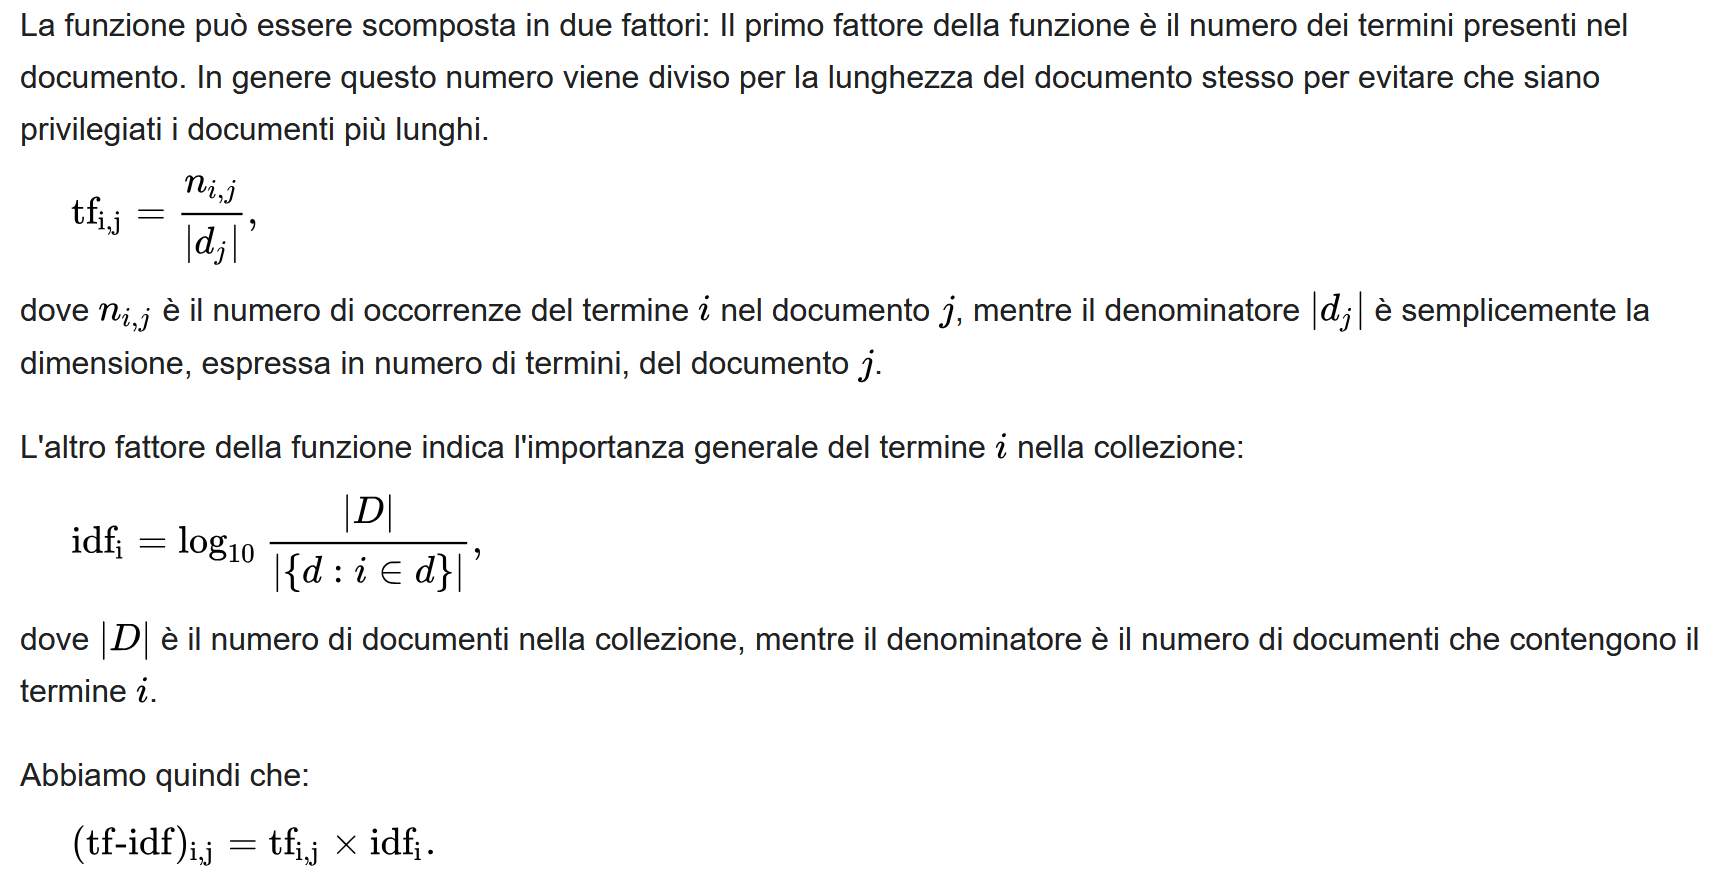

In [15]:
#We reuse the vocabulary computed for the previous section so execute that first.
print(vocabulary)

['0', '00', '0000', '0001', '00s', '01', '019', '028', '045', '048052', '06', '07', '0914', '1', '10', '100', '1000', '100200', '100httpwwwyoutubecomwatchvufsej7aogi', '100km', '100something', '101', '1010', '1011', '1015', '102', '1020', '1023', '1043', '105', '1080', '10am', '10c', '10k', '10mph', '10th', '11', '110', '112', '1174', '11th', '12', '120', '1200', '12001400', '1207', '120wpm', '121', '1216', '12312008', '12500', '127', '128', '12mb', '12pm', '12year', '13', '130', '1300', '130lbs', '1314', '13541496', '138', '13m', '13yearold', '14', '140150', '140160', '1418', '1424', '144', '15', '150000', '15020', '154', '155', '15m18m', '16', '160', '16000', '1618', '162', '16s', '16x', '16x16', '170', '1700', '170lbs', '175', '176', '176625', '1779', '17ish', '18', '180', '18000', '180lbs', '182205858672', '1880', '18kgs', '19', '1900', '1910', '1910s', '1917', '1920s', '1926', '1927', '1928110142', '1930', '1932', '1933', '1947', '1950s”', '1960s', '1960sto', '1966', '1972', '1976

In [16]:
#Compute the idf factor for each word in the vocabulary.
idf = []
import math

for word in vocabulary:
    count = 0
    for sentence in processed_corpus:
       if word in sentence:
           count += 1
    count = (df_grouped.shape[0]) / (count) #Aggiunta 1 necessaria per evitare eventuali divisioni per zero.
    count = math.log(count) 
    idf.append(count)

In [17]:
print(idf)

[2.5257286443082556, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 1.1394342831883648, 1.4271163556401458, 1.7147984280919266, 2.8134107167600364, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.2188758248682006, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.2188758248682006, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 2.302585092994046, 3.912023005428146, 3.2188758248682006, 3.912023005428146, 3.2188758248682006, 1.6094379124341003, 3.912023005428146, 3.2188758248682006, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 3.912023005428146, 

In [18]:
#for i in range(3000):
#    print(i, vocabulary[i], " ", idf[i])\
    
#LE PAROLE MENO COMUNI HANNO VALORI PIU ALTI.
print("parola comune: ", vocabulary[2996], " idf: ", idf[2996])
print("parola rara: ", vocabulary[2781], " idf: ", idf[2781])
print("Le parole le usate dai diversi users hanno valori piu bassi, quanto sono stati usati dal singolo user non influisce.")

parola comune:  damn  idf:  1.3470736479666094
parola rara:  cowboy  idf:  3.912023005428146
Le parole le usate dai diversi users hanno valori piu bassi, quanto sono stati usati dal singolo user non influisce.


In [19]:
#now to compute the second metric TF and directly the TF-IDF



def create_TF_IDF_vector(sentence, vocab, idf):
    vector = [0] * len(vocab)  # If not present in user's comment then TF-IDF is 0.
    for word in sentence:
        if word in vocab:
            idx = vocab.index(word)  # Find the index of the word in the vocabulary
            vector[idx] += 1  # Increment the count at that index
    
    
    for i in range(len(vocab)):
        vector[i] = vector[i] / len(sentence)
        vector[i] = vector[i] * idf[i]
    
    return vector

In [20]:
# Create TF-IDF vector for each sentence in the processed corpus
TFIDF_vectors = [create_TF_IDF_vector(sentence, vocabulary, idf) for sentence in processed_corpus]
print("TF-IDF Vectors:")
for vector in TFIDF_vectors:
    print(vector)

TF-IDF Vectors:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009738754557165512, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019680214470034582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03343609406348843, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [21]:
#Debug - checks
for sentence in processed_corpus:
    print(len(sentence))

117
5
604
331
75
38
4
35
137
2331
617
903
6265
361
277
6
504
15436
19
39
4123
142
43
886
3032
32
4176
745
217
17070
6121
91
1159
64
221
24534
90
872
3939
611
330
3839
177
5437
157
7972
8
703
1143
388


In [22]:
#Debug - checks
ind = 0
for el in TFIDF_vectors[1]:
    if el != 0.0:
        print(el, ind)
    ind = ind + 1

0.7824046010856293 4242
0.07133498878774648 6466
0.24079456086518725 9383
0.1307852934813328 9399
0.025566674301977 11543


In [23]:
#Debug - checks
print(idf[4242]*0.2, idf[6466]*0.2,idf[9383]*0.2, idf[9399]*0.2,idf[11543]*0.2)

0.7824046010856293 0.07133498878774648 0.24079456086518725 0.1307852934813328 0.025566674301977


Last part of the exercise asks if you can notice/explain the difference between the BoW representation and the TF-IDf two so i'll briefly recap.

In [24]:
for i in range(10):
    i = i+20 #solo per non guardare sempre gli stessi.
    print("index: ", i, "TF-IDF: ",TFIDF_vectors[i])
    print("index: ", i, "bow_words: ",bow_vectors[i])
    print("\n")


index:  20 TF-IDF:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00027636048585698877, 0.00034613542460347946, 0.0004159103633499701, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007849694358757677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007807120603609509, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [25]:
ind = 0
for el in TFIDF_vectors[1]:
    if el != 0.0:
        print(el, ind)
        print("index: ", ind, " TF-IDF: ", el, " for word: ", vocabulary[ind])
    ind = ind + 1

0.7824046010856293 4242
index:  4242  TF-IDF:  0.7824046010856293  for word:  faq
0.07133498878774648 6466
index:  6466  TF-IDF:  0.07133498878774648  for word:  just
0.24079456086518725 9383
index:  9383  TF-IDF:  0.24079456086518725  for word:  read
0.1307852934813328 9399
index:  9399  TF-IDF:  0.1307852934813328  for word:  really
0.025566674301977 11543
index:  11543  TF-IDF:  0.025566674301977  for word:  the


In [26]:
ind = 0
for el in bow_vectors[1]:
    if el != 0.0:
        print(el, ind)
        print("index: ", ind, " TF-IDF: ", el, " for word: ", vocabulary[ind])
    ind = ind + 1

1 4242
index:  4242  TF-IDF:  1  for word:  faq
1 6466
index:  6466  TF-IDF:  1  for word:  just
1 9383
index:  9383  TF-IDF:  1  for word:  read
1 9399
index:  9399  TF-IDF:  1  for word:  really
1 11543
index:  11543  TF-IDF:  1  for word:  the


The main difference is visible quite clearly by printing the previous two cells for user with index 1. As we can see that user ever only typed five words, presumably in the same comment which we can divine from the word to have been 'really just read the faq'

With BoW we replace each word simply with the count of it, and hence get a vector of only zeroes for all the other words in vocabulary and 1 for these five.

On the other hand TF-IDF does a more complex computation where 'the' also considers the count in the sentence (1) but also how common the word is among all the users and seeing that it's quite common it gets a much smaller value than the others. This is meant to give us an idea that the word 'the' probably doesn't carry a lot of significance as it's more common.

Which is best for our task seems disputable, for instance if there was a hypothetical word predominantly used by male redditers TF-IDF would eroneously assign it a small value as a large number of the users would have used it. On the other hand such a magical classifying word is unlikely to be present and intuitively it is preferable to give lesser weight to overly common words unlikely to carry much significance.

The solution naturally is to try our models with both and check which is better.

# Wrap up - Writing the datasets

Naturally at this point I must save the two stored representations with a name that allows us to distinguish them at a glance yet remember they came from the output of 1.3

I will go with
supervised-1.3-BoW
supervised-1.3-TF-IDF

I am uncertain whether the vocabulary is also needed for further sections so I will also create
1.3-vocab.csv

which I will save to the data folder but also add to the .gitignore.
If you need the files re-execute 1.3 locally.
Remember you can change which file is used as input at the top.

For questions/problems it was Matteo Sottocornola who did this part.

In [27]:
#print(vocabulary)
vocab_df = pd.DataFrame(vocabulary, columns=["word"])
#print(vocab_df)   #presenza emoji normale, presenti nel testo iniziale.

In [28]:
print(df_grouped)

                  author                                               body
0                 -Jared  Neil Diamond - Sweet Caroline +1 on the chirop...
1                -Peeter                         Just read the FAQ, really.
2               -evasian  I just received my Deathadder Black Edition ye...
3                -rubiks  AlunaGeorge - Best Be Believing\nArctic Monkey...
4         -true_neutral-  &gt; Urban Ears Metis\n\nYMMV. I have had thre...
5                -willis  wow, I'm an idiot.  I meant to post it there. ...
6               00708070                           This is actually perfect
7                0200008  I totally agree, but I think there's a point a...
8              05Lanky05  Put some Kasabian on... Holy fuck it's amazing...
9        0urlittlesecret  There is no way you are so enamoured as I... J...
10             0utlander  There is another tribe in the Normandy area in...
11                 0xJRS  Wow. 16x as much water is a huge amount.. Lol,...
12          

In [29]:
df_grouped = df_grouped.drop(columns=['body'])
usernames = df_grouped["author"].reset_index(drop=True)

In [30]:


tfidf_df = pd.DataFrame(TFIDF_vectors, columns=vocabulary)
bow_df = pd.DataFrame(bow_vectors, columns=vocabulary)

In [31]:
print(usernames)

0                   -Jared
1                  -Peeter
2                 -evasian
3                  -rubiks
4           -true_neutral-
5                  -willis
6                 00708070
7                  0200008
8                05Lanky05
9          0urlittlesecret
10               0utlander
11                   0xJRS
12               105Hummel
13              11235813__
14                12013177
15                 1234ape
16               12ozcurls
17                 12sea21
18                    1482
19           14Gigaparsecs
20                  17to85
21       19941611811914919
22                1995C220
23    1_point_21_gigawatts
24        1n1billionAZNsay
25               1stonepwn
26                    1up-
27                2012ctsv
28    21yovirginconfession
29               23skiddsy
30            26thandsouth
31        2damsels1chalice
32               2ndXCharm
33             2tomidnight
34             2wheelsgood
35                3DGrunge
36                    3gcb
3

In [32]:
print(tfidf_df)

           0        00      0000     0001       00s        01       019  \
0   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
12  0.000000  0.000000  0

In [33]:
tfidf_df = pd.merge(usernames, tfidf_df, left_index=True, right_index=True)
bow_df = pd.merge(usernames, bow_df, left_index=True, right_index=True)

In [34]:
print(tfidf_df)

                author_x         0        00      0000     0001       00s  \
0                 -Jared  0.000000  0.000000  0.000000  0.00000  0.000000   
1                -Peeter  0.000000  0.000000  0.000000  0.00000  0.000000   
2               -evasian  0.000000  0.000000  0.000000  0.00000  0.000000   
3                -rubiks  0.000000  0.000000  0.000000  0.00000  0.000000   
4         -true_neutral-  0.000000  0.000000  0.000000  0.00000  0.000000   
5                -willis  0.000000  0.000000  0.000000  0.00000  0.000000   
6               00708070  0.000000  0.000000  0.000000  0.00000  0.000000   
7                0200008  0.000000  0.000000  0.000000  0.00000  0.000000   
8              05Lanky05  0.000000  0.000000  0.000000  0.00000  0.000000   
9        0urlittlesecret  0.000000  0.000000  0.000000  0.00000  0.000000   
10             0utlander  0.000000  0.000000  0.000000  0.00000  0.000000   
11                 0xJRS  0.000000  0.000000  0.000000  0.00000  0.000000   

In [ ]:
vocab_df.to_csv("../data/1-3/1.3-vocab.csv", index=False)
tfidf_df.to_csv("../data/1-3/supervised-1.3-TF-IDF.csv", index=False)
bow_df.to_csv("../data/1-3/supervised-1.3-BoW.csv", index=False)